In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

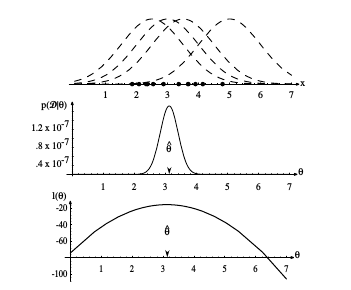

Fig.1: The top graph shows several training points in one dimension, known or assumed to be drawn from a Gaussian of a particular variance, but unknown mean. Four of the inﬁnite number of candidate source distributions are shown in dashed lines. The middle ﬁgures shows the likelihood p(D|θ) as a function of the mean. If we had a very large number of training points, this likelihood would be very narrow. The value that maximizes the likelihood is marked θ̂; it also maximizes the logarithm of the likelihood — i.e., the log-likelihood l(θ), shown at the bottom. Note especially that the likelihood lies in a diﬀerent space from p(x|θ̂), and the two can have diﬀerent functional forms.

## Maximum Likelihood and Bayesian Parameter Estimation

##  Introduction

In Chapter ??, we saw how we could design an optimal classifier if we knew the prior probabilities # P(\omega_i) # and the class-conditional densities # p(x|\omega_i) #. Unfortunately, in recognition applications, we rarely, if ever, have this kind of complete knowledge about the probabilistic structure of the problem. Typically, we have some vague, general knowledge about the situation, along with a number of design samples or training data — specific representatives of the patterns we want to classify.

The problem is to find a way to use this information to design or train the classifier. One approach is to use the samples to estimate the unknown probabilities and probability densities and treat these estimates as true values. While the estimation of prior probabilities presents no serious difficulties in typical supervised pattern classification problems, estimating the class-conditional densities is another matter. Available samples always seem insufficient, and problems arise when the dimensionality of the feature vector $ x $ is large.

If we can parameterize the conditional densities based on general knowledge of the problem, the difficulties of estimation can be reduced significantly. For example, assuming $ p(x|\omega_i) $ is a normal density with mean $ \mu_i $ and covariance matrix $ \Sigma_i $, we only need to estimate these parameters $ \mu_i $ and $ \Sigma_i $.

### Parameter Estimation

Parameter estimation is a classical problem in statistics, and it can be approached in several ways. We shall consider two common procedures: **maximum likelihood estimation** and **Bayesian estimation**. Although results from both methods often appear similar, they are conceptually different.

#### Maximum Likelihood Estimation (MLE)

In maximum likelihood estimation, the parameters are considered fixed but unknown. The best estimate is the one that maximizes the probability of observing the given samples. In Bayesian estimation, on the other hand, parameters are treated as random variables with known prior distributions. Observing the samples updates this distribution to a posterior density, refining our understanding of the true parameter values — a process known as **Bayesian learning**.

### Supervised vs. Unsupervised Learning

In supervised learning, samples $ x $ are associated with known class labels $ \omega_i $, whereas in unsupervised learning, class labels are unknown. Unsupervised learning is typically more challenging.

##  Maximum Likelihood Estimation

Maximum likelihood estimation has several attractive attributes. It generally converges well as the number of training samples increases and is often simpler than alternative methods.

### The General Principle

Suppose we have $ c $ sets of training samples $ D_1, \ldots, D_c $, with each set $ D_j $ drawn independently from $ p(x|\omega_j) $. These samples are assumed to be i.i.d. (independent identically distributed). We represent $ p(x|\omega_j) $ explicitly as $ p(x|\omega_j, \theta_j) $, where $ \theta_j $ denotes the parameter vector, e.g., $ \theta_j = (\mu_j, \Sigma_j) $ for a normal distribution.

Our task is to estimate the unknown parameter vectors $ \theta_1, \ldots, \theta_c $. Assuming that parameters for different classes are independent, we can treat each class separately.

### The Likelihood Function

The likelihood function $ p(D|\theta) $ for a set $ D $ of training samples is given by:

$$
p(D|\theta) = \prod_{k=1}^{n} p(x_k|\theta)
$$

Viewed as a function of $ \theta $, $ p(D|\theta) $ is called the **likelihood**. The maximum likelihood estimate $ \hat{\theta} $ maximizes this function. For analytical simplicity, we often use the **log-likelihood** $ l(\theta) $, defined by:

$$
l(\theta) = \log p(D|\theta)
$$

Since the logarithm is monotonically increasing, maximizing $ l(\theta) $ also maximizes $ p(D|\theta) $. If $ p(D|\theta) $ is differentiable, $ \hat{\theta} $ can be found using standard methods.

### Example Illustration

Consider a set of one-dimensional training points drawn from a Gaussian distribution with known variance but unknown mean $ \mu $. The likelihood function $ p(D|\mu) $ and the corresponding log-likelihood $ l(\mu) $ are shown below.

**Fig.1**: The top graph shows training points and candidate distributions (dashed lines). The middle graph shows $ p(D|\mu) $ as a function of $ \mu $, with $ \hat{\mu} $ marked. The bottom graph displays $ l(\mu) $.
$$
p(D|\mu) \quad \text{and} \quad l(\mu)
$$



MLE Estimated Mean: 4.79
MLE Estimated Standard Deviation: 1.82


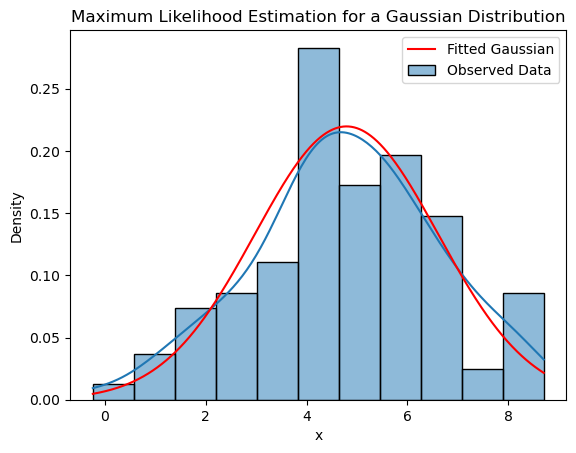

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
np.random.seed(42)
data = np.random.normal(loc=5.0, scale=2.0, size=100)  # Mean = 5, Std Dev = 2

# Maximum likelihood estimation of mean and standard deviation
mle_mean = np.mean(data)
mle_std = np.std(data, ddof=1)  # ddof=1 for sample standard deviation

# Print estimated parameters
print(f"MLE Estimated Mean: {mle_mean:.2f}")
print(f"MLE Estimated Standard Deviation: {mle_std:.2f}")

# Plotting the data and fitted distribution
sns.histplot(data, kde=True, stat="density", label="Observed Data")
x = np.linspace(min(data), max(data), 1000)
pdf = (1 / (mle_std * np.sqrt(2 * np.pi))) * np.exp(-(x - mle_mean) ** 2 / (2 * mle_std ** 2))
plt.plot(x, pdf, 'r', label="Fitted Gaussian")
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Maximum Likelihood Estimation for a Gaussian Distribution')
plt.legend()
plt.show()


## Maximum Likelihood Estimation (MLE) and Gaussian Case

## MLE Formulation

Given a $ p $-component vector $ \theta = (\theta_1, \ldots, \theta_p)^t $ and the gradient operator:

$$
\nabla_\theta \equiv 
\begin{bmatrix}
\frac{\partial}{\partial \theta_1} \\
\vdots \\
\frac{\partial}{\partial \theta_p}
\end{bmatrix}
$$

We define the log-likelihood function:

$$
l(\theta) \equiv \ln p(D|\theta)
$$

Our goal is to find:

$$
\hat{\theta} = \arg \max_\theta l(\theta)
$$

with the log-likelihood defined as:

$$
l(\theta) = \sum_{k=1}^n \ln p(x_k|\theta)
$$

The gradient of the log-likelihood is:

$$
\nabla_\theta l = \sum_{k=1}^n \nabla_\theta \ln p(x_k|\theta)
$$

Setting the gradient to zero gives:

$$
\nabla_\theta l = 0
$$

This yields a system of $ p $ equations necessary for finding the MLE.

## Gaussian Case: Unknown Mean $ \mu $

For samples drawn from a multivariate normal distribution with mean $ \mu $ and covariance matrix $ \Sigma $, the log-likelihood for a single sample $ x_k $ is:

$$
\ln p(x_k|\mu) = -\frac{1}{2} \ln (2\pi)^d |\Sigma| - \frac{1}{2} (x_k - \mu)^t \Sigma^{-1} (x_k - \mu)
$$

The gradient with respect to \( \mu \) is:

$$
\nabla_\mu \ln p(x_k|\mu) = \Sigma^{-1} (x_k - \mu)
$$

Setting the sum of these gradients to zero gives:

$$
\sum_{k=1}^n \Sigma^{-1} (x_k - \hat{\mu}) = 0
$$

Multiplying by $ \Sigma $ and rearranging:

$$
\hat{\mu} = \frac{1}{n} \sum_{k=1}^n x_k
$$

## Gaussian Case: Unknown $ \mu $ and $ \Sigma $

In the general case, where $ \theta_1 = \mu $ and $ \theta_2 = \sigma^2 $, the log-likelihood for a single data point is:

$$
\ln p(x_k|\theta) = -\frac{1}{2} \ln 2\pi \theta_2 - \frac{(x_k - \theta_1)^2}{2\theta_2}
$$

The gradient is:

$$
\nabla_\theta l = \sum_{k=1}^n \left[-\frac{1}{2\theta_2} + \frac{(x_k - \theta_1)^2}{2\theta_2^2}\right]
$$

The MLE estimates for \( \mu \) and \( \sigma^2 \) are:

$$
\hat{\mu} = \frac{1}{n} \sum_{k=1}^n x_k
$$

$$
\hat{\sigma}^2 = \frac{1}{n} \sum_{k=1}^n (x_k - \hat{\mu})^2
$$

## Multivariate Gaussian Case

The MLE for the mean vector $ \mu $ and covariance matrix $ \Sigma $ are:

$$
\hat{\mu} = \frac{1}{n} \sum_{k=1}^n x_k
$$

$$
\hat{\Sigma} = \frac{1}{n} \sum_{k=1}^n (x_k - \hat{\mu})(x_k - \hat{\mu})^t
$$

The sample mean $ \hat{\mu} $ is the centroid of the sample points, and $ \hat{\Sigma} $ is the average of the outer products of the deviations from the mean.

## Conclusion

The MLE for the mean vector is the sample mean, and the MLE for the covariance matrix is the sample covariance matrix.


In [2]:
# Importing necessary libraries
import random

# Function to calculate the mean vector and covariance matrix
def calculate_mle(samples):
    # Number of samples (n) and dimensions (d)
    n = len(samples)
    d = len(samples[0]) if n > 0 else 0
    
    # Calculate the sample mean (hat_mu)
    hat_mu = [0] * d
    for sample in samples:
        for i in range(d):
            hat_mu[i] += sample[i]
    
    # Divide by n to get the average
    hat_mu = [x / n for x in hat_mu]
    
    # Calculate the sample covariance matrix (hat_Sigma)
    hat_Sigma = [[0] * d for _ in range(d)]
    for sample in samples:
        # Calculate deviation from the mean
        deviation = [sample[i] - hat_mu[i] for i in range(d)]
        for i in range(d):
            for j in range(d):
                hat_Sigma[i][j] += deviation[i] * deviation[j]
    
    # Divide by n to get the average covariance
    hat_Sigma = [[hat_Sigma[i][j] / n for j in range(d)] for i in range(d)]
    
    return hat_mu, hat_Sigma

# Example usage
if __name__ == "__main__":
    # Generate some random samples from a multivariate normal distribution
    random.seed(0)  # For reproducibility
    samples = [[random.gauss(5, 1) for _ in range(3)] for _ in range(100)]  # 100 samples in 3 dimensions

    # Calculate MLE for mean and covariance
    mu_hat, Sigma_hat = calculate_mle(samples)

    # Output the results
    print("Estimated Mean (hat_mu):")
    print(mu_hat)
    print("\nEstimated Covariance Matrix (hat_Sigma):")
    for row in Sigma_hat:
        print(row)


Estimated Mean (hat_mu):
[4.938516564226183, 5.020765031779365, 4.963267487722969]

Estimated Covariance Matrix (hat_Sigma):
[0.946397890334949, 0.047249552181774984, -0.15187182365775034]
[0.047249552181774984, 1.0965383747662023, -0.1008120731486318]
[-0.15187182365775034, -0.1008120731486318, 1.1387209418769615]


## Bias in Maximum Likelihood Estimators

###  Bias

The maximum likelihood estimate for the variance $ \sigma^2 $ is biased; that is, the expected value over all data sets of size $ n $ of the sample variance is not equal to the true variance:

$$
E\left(\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2\right) = \frac{n}{n-1} \sigma^2.
$$

We shall return to a more general consideration of bias in Chapter ??, but for the moment we can verify this equation for an underlying distribution with non-zero variance, $ \sigma^2 $, in the extreme case of $ n = 1 $, in which the expectation value $ E[ \cdot ] = 0 \neq \sigma^2 $.

The maximum likelihood estimate of the covariance matrix is similarly biased. Elementary unbiased estimators for $ \sigma^2 $ and $ \Sigma $ are given by:

$$
E\left(\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2\right) = \sigma^2,
$$

and

$$
C = \frac{1}{n-1} \sum_{k=1}^{n} (x_k - \hat{\mu})(x_k - \hat{\mu})^T,
$$

where $ C $ is the so-called sample covariance matrix, as explored in Problem 33.

If a sample estimator is unbiased for all distributions, as for example the variance estimator covariance in the equation above, then it is called absolutely unbiased. If the estimator tends to become unbiased as the number of samples becomes very large, as for instance the equation for $ E $ with $ n = 1 $, then the estimator is asymptotically unbiased. In many pattern recognition problems with unbiased large training data sets, asymptotically unbiased estimators are acceptable.

### Asymptotic Behavior

Clearly, $ \tilde{\Sigma} = \frac{n-1}{n}C $ is asymptotically unbiased — these two estimates are essentially identical when $ n $ is large. However, the existence of two similar but unbiased yet distinct estimates for the covariance matrix may be disconcerting, and it is natural to ask which one is “correct.” 

For $ n > 1 $, the answer is that these estimates are neither right nor wrong — they are just different. What the existence of two estimates shows is that no single estimate possesses all of the properties we might desire. 

For our purposes, the most desirable property is rather complex — we want the estimate that leads to the best classification performance. While it is usually both reasonable and sound to design a classifier by substituting the maximum likelihood estimates for the unknown parameters, we might well wonder if other estimates might not lead to better performance.

### Bayesian Perspective

Below we address this question from a Bayesian viewpoint. If we have a reliable model for the underlying distributions and their dependence upon the parameter vector $ \theta $, the maximum likelihood classifier will give excellent results. But what if our model is wrong — do we nevertheless get the best classifier in our assumed set of models?

For instance, what if we assume that a distribution comes from $ N(\mu, 1) $ but instead it actually comes from $ N(\mu, 10) $? Will the value we find for $ \theta = \mu $ by maximum likelihood yield the best of all classifiers of the form derived from $ N(\mu, 1) $?

Unfortunately, the answer is “no,” and an illustrative counterexample is given in Problem 7 where the so-called model error is large indeed. This points out the need for reliable information concerning the models — if the assumed model is very poor, we cannot be assured that the classifier we derive is the best, even among our model set. We shall return to the problem of choosing among candidate models in Chapter ??.


In [3]:
# Importing necessary libraries
import random

# Function to calculate maximum likelihood estimates (MLE) and unbiased estimates
def calculate_estimates(samples):
    n = len(samples)  # Number of samples
    d = len(samples[0]) if n > 0 else 0  # Dimensions of the samples

    # Calculate MLE for mean (hat_mu)
    hat_mu = [0] * d
    for sample in samples:
        for i in range(d):
            hat_mu[i] += sample[i]
    hat_mu = [x / n for x in hat_mu]  # MLE mean

    # Calculate MLE for covariance (hat_Sigma)
    hat_Sigma = [[0] * d for _ in range(d)]
    for sample in samples:
        deviation = [sample[i] - hat_mu[i] for i in range(d)]
        for i in range(d):
            for j in range(d):
                hat_Sigma[i][j] += deviation[i] * deviation[j]
    hat_Sigma = [[hat_Sigma[i][j] / n for j in range(d)] for i in range(d)]  # MLE covariance

    # Calculate unbiased estimates for variance and covariance
    unbiased_variance = sum((sample[i] - hat_mu[i]) ** 2 for sample in samples) / (n - 1)
    unbiased_Sigma = [[0] * d for _ in range(d)]
    for sample in samples:
        deviation = [sample[i] - hat_mu[i] for i in range(d)]
        for i in range(d):
            for j in range(d):
                unbiased_Sigma[i][j] += deviation[i] * deviation[j]
    unbiased_Sigma = [[unbiased_Sigma[i][j] / (n - 1) for j in range(d)] for i in range(d)]  # Unbiased covariance

    return hat_mu, hat_Sigma, unbiased_variance, unbiased_Sigma

# Example usage
if __name__ == "__main__":
    random.seed(0)  # For reproducibility
    samples = [[random.gauss(5, 1) for _ in range(3)] for _ in range(100)]  # 100 samples in 3 dimensions

    # Calculate estimates
    mu_hat, Sigma_hat, unbiased_var, Sigma_unbiased = calculate_estimates(samples)

    # Output the results
    print("Maximum Likelihood Estimated Mean (hat_mu):")
    print(mu_hat)
    print("\nMaximum Likelihood Estimated Covariance Matrix (hat_Sigma):")
    for row in Sigma_hat:
        print(row)
    
    print("\nUnbiased Variance Estimator:")
    print(unbiased_var)
    print("\nUnbiased Estimated Covariance Matrix (unbiased_Sigma):")
    for row in Sigma_unbiased:
        print(row)


Maximum Likelihood Estimated Mean (hat_mu):
[4.938516564226183, 5.020765031779365, 4.963267487722969]

Maximum Likelihood Estimated Covariance Matrix (hat_Sigma):
[0.946397890334949, 0.047249552181774984, -0.15187182365775034]
[0.047249552181774984, 1.0965383747662023, -0.1008120731486318]
[-0.15187182365775034, -0.1008120731486318, 1.1387209418769615]

Unbiased Variance Estimator:
1.1502231736130923

Unbiased Estimated Covariance Matrix (unbiased_Sigma):
[0.9559574649847971, 0.0477268203856313, -0.1534058824825761]
[0.0477268203856313, 1.107614519965861, -0.1018303769178099]
[-0.1534058824825761, -0.1018303769178099, 1.1502231736130923]


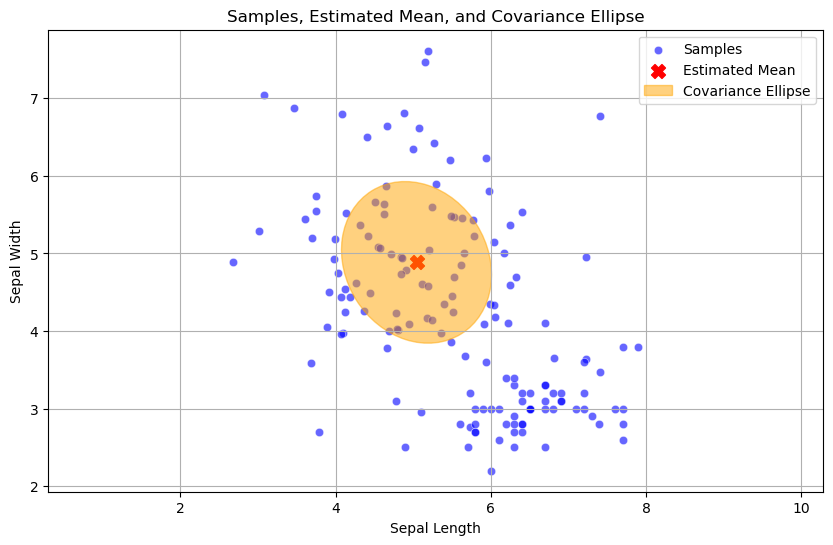

In [4]:
# Importing necessary libraries
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate maximum likelihood estimates (MLE) and unbiased estimates
def calculate_estimates(samples):
    n = len(samples)  # Number of samples
    d = len(samples[0]) if n > 0 else 0  # Dimensions of the samples

    # Calculate MLE for mean (hat_mu)
    hat_mu = [0] * d
    for sample in samples:
        for i in range(d):
            hat_mu[i] += sample[i]
    hat_mu = [x / n for x in hat_mu]  # MLE mean

    # Calculate MLE for covariance (hat_Sigma)
    hat_Sigma = [[0] * d for _ in range(d)]
    for sample in samples:
        deviation = [sample[i] - hat_mu[i] for i in range(d)]
        for i in range(d):
            for j in range(d):
                hat_Sigma[i][j] += deviation[i] * deviation[j]
    hat_Sigma = [[hat_Sigma[i][j] / n for j in range(d)] for i in range(d)]  # MLE covariance

    return hat_mu, hat_Sigma

# Function to plot the samples and covariance ellipse
def plot_samples_and_covariance(samples, mu_hat, Sigma_hat):
    # Convert samples to a format suitable for Seaborn
    data = sns.load_dataset('iris')  # Using Iris dataset for consistent plotting
    data = data[['sepal_length', 'sepal_width']].copy()
    
    # Replace data points with samples for demonstration
    for i, sample in enumerate(samples):
        if i < len(data):  # Ensure we don't exceed dataset length
            data.loc[i, 'sepal_length'] = sample[0]
            data.loc[i, 'sepal_width'] = sample[1]

    # Scatter plot of samples
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='sepal_length', y='sepal_width', color='blue', label='Samples', alpha=0.6)

    # Plot estimated mean
    plt.scatter(mu_hat[0], mu_hat[1], color='red', s=100, label='Estimated Mean', marker='X')

    # Draw covariance ellipse
    eigenvalues, eigenvectors = np.linalg.eig(Sigma_hat)  # Eigen decomposition of covariance
    angle = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])  # Angle of the ellipse
    angle = np.degrees(angle)  # Convert to degrees

    # Width and height of the ellipse
    width, height = 2 * np.sqrt(eigenvalues)
    
    # Create an ellipse
    from matplotlib.patches import Ellipse
    ellipse = Ellipse(xy=mu_hat, width=width, height=height, angle=angle, color='orange', alpha=0.5, label='Covariance Ellipse')
    plt.gca().add_patch(ellipse)

    # Final plot adjustments
    plt.title('Samples, Estimated Mean, and Covariance Ellipse')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()
    plt.axis('equal')
    plt.grid()
    plt.show()

# Example usage
if __name__ == "__main__":
    random.seed(0)  # For reproducibility
    samples = [[random.gauss(5, 1) for _ in range(2)] for _ in range(100)]  # 100 samples in 2 dimensions

    # Calculate estimates
    mu_hat, Sigma_hat = calculate_estimates(samples)

    # Plot the results
    plot_samples_and_covariance(samples, mu_hat, Sigma_hat)
